In [1]:
import sys
import pandas as pd
import numpy as np
from itertools import combinations
from matplotlib import font_manager

# Specify the path to the Calibri font file on your system
calibri_path = "/hpc/home/yx240/fonts/calibri.ttf"  # Example path, adjust as necessary
font_manager.fontManager.addfont(calibri_path)
import seaborn as sns
pastel_palette = sns.color_palette("pastel")
# Convert the colors to hexadecimal
pastel_colors_hex = pastel_palette.as_hex()
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.decomposition import PCA

# Generate all possible combinations.

In [2]:
atoms_pool = [12, 13, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 38, 56]
c = []
for i in range(5, 11):
    c += list(combinations(atoms_pool, i))
df = pd.DataFrame({'atom_list': c})
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
df['purity'] = -1
X = df[atom_dict.values()]
df

,atom_list,Mg,Al,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Sr,Ba,purity
0,"(12, 13, 20, 22, 23)",0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,"(12, 13, 20, 22, 24)",0.2,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,"(12, 13, 20, 22, 25)",0.2,0.2,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,"(12, 13, 20, 22, 26)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,"(12, 13, 20, 22, 27)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14438,"(22, 23, 24, 25, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,-1
14439,"(22, 23, 24, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14440,"(22, 23, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14441,"(22, 24, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1


# Figure 1

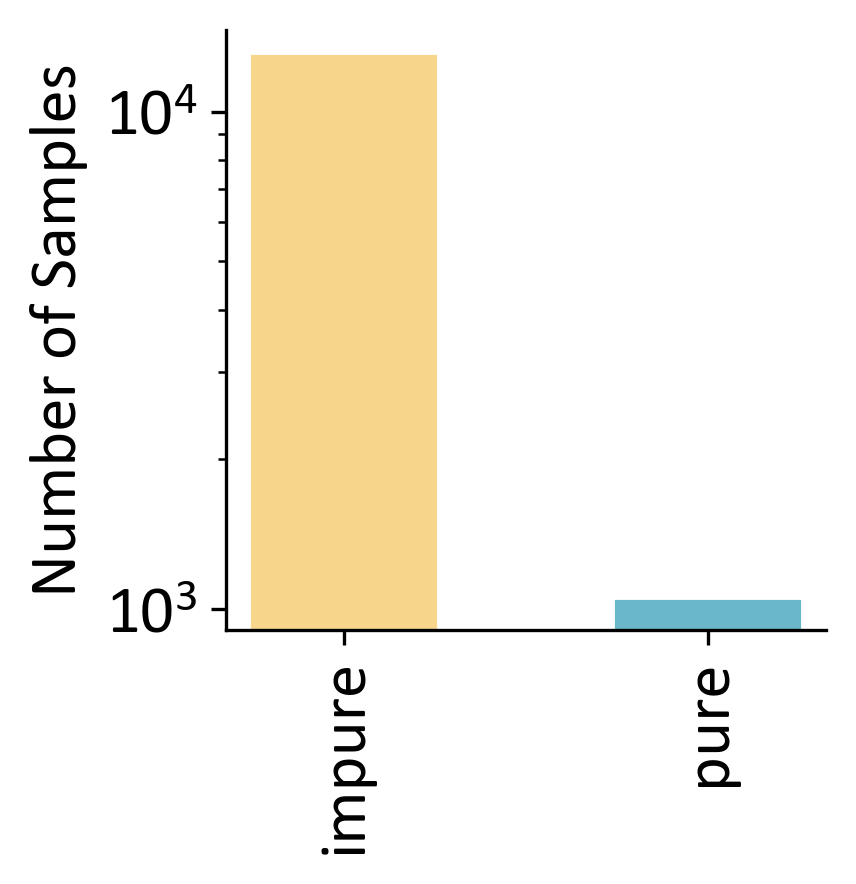

In [3]:
# Assuming you have defined al_idx as a list containing indices for subfigures

fs = 2
params = {
    'legend.fontsize': '%s' % (4. * fs),
    'figure.figsize': (fs, fs),  # 10*2
    'axes.labelsize': '%s' % (8 * fs),
    'axes.titlesize': '%s' % (5 * fs),
    'xtick.labelsize': '%s' % (8 * fs),
    'ytick.labelsize': '%s' % (8 * fs),
    'font.family': 'Calibri',
    'font.serif': 'calibri',
    'savefig.dpi': 300,
    'figure.dpi': 300,
}
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()
colors = ['#6BB7CA', '#9BC985', '#9DD0C7', '#F7D58B', '#E58579']
ax = fig.add_axes([0, 0, 1, 1])
bars = ax.bar(range(2), [14443 - 1033 - 514 - 20, 1033], width=0.5)
bars[0].set_color(colors[3])
bars[1].set_color(colors[0])
ax.set_ylabel('Number of Samples')
ax.set_xticks(range(2))
ax.set_xticklabels(['impure', 'pure'], rotation=90)
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

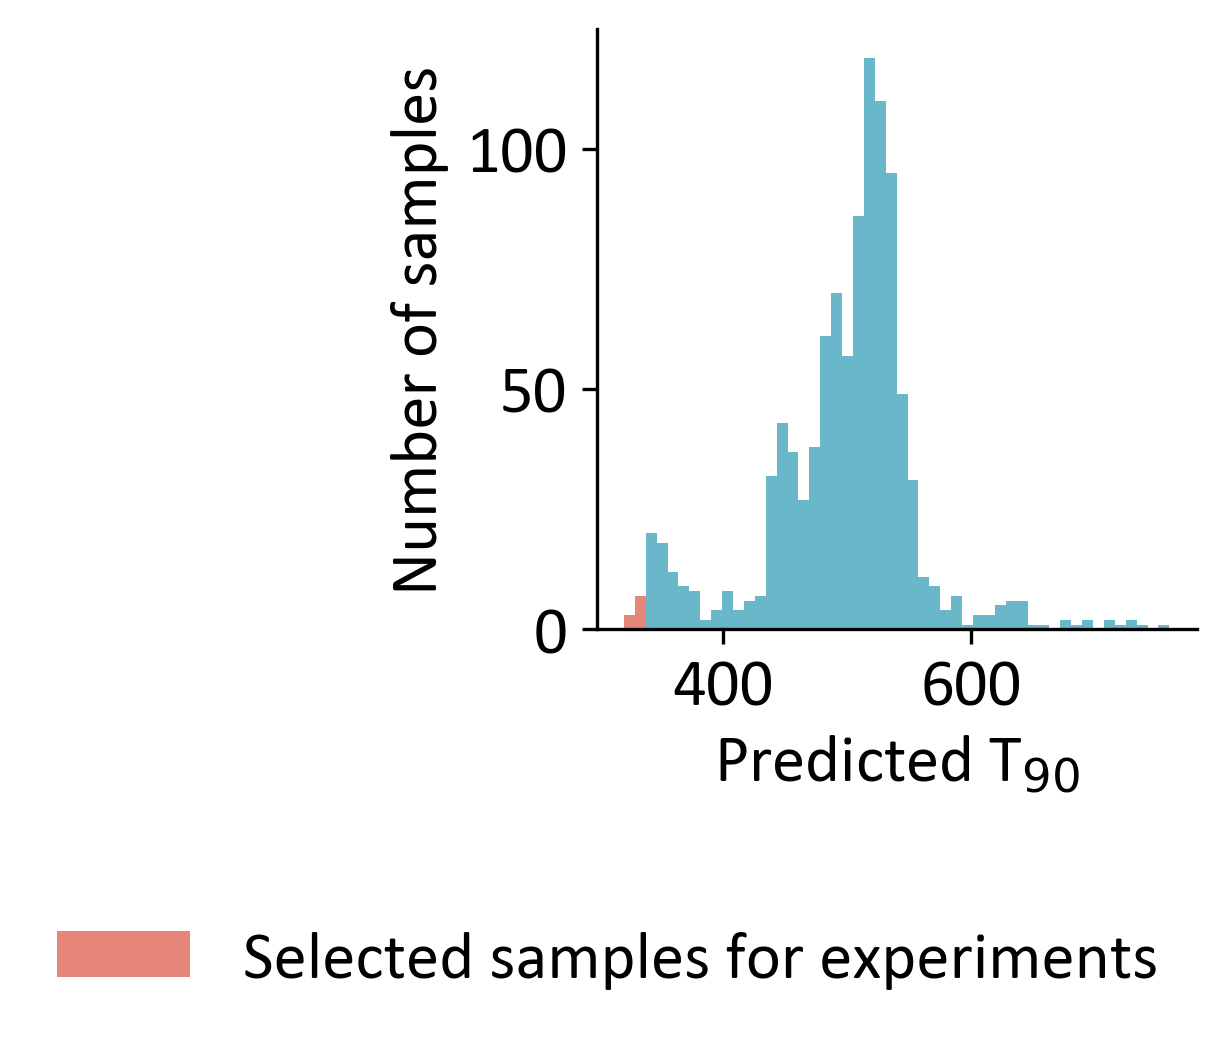

In [4]:
fs = 2
params = {
    'legend.fontsize': '%s' % (8. * fs),
    'figure.figsize': (fs, fs),  # 10*2
    'axes.labelsize': '%s' % (8 * fs),
    'axes.titlesize': '%s' % (5 * fs),
    'xtick.labelsize': '%s' % (8 * fs),
    'ytick.labelsize': '%s' % (8 * fs),
    'font.family': 'Calibri',
    'font.serif': 'calibri',
    'savefig.dpi': 300,
    'figure.dpi': 300,
}
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()
ax = fig.add_axes([0, 0, 1, 1])
df = pd.read_csv('al.csv')
bins = 50
range_min = min(df['T90_pred'])
range_max = max(df['T90_pred'])

# Plot the histograms
ax.hist(df['T90_pred'].tolist()[10:], bins=bins, range=(range_min, range_max), color=colors[0])
ax.hist(df['T90_pred'].tolist()[:10], bins=bins, range=(range_min, range_max), label='Selected samples for experiments', color=colors[4])

ax.set_xlabel(r'Predicted T$_{90}$')
ax.set_ylabel('Number of samples')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
ax.legend(frameon=False, bbox_to_anchor=(-1, -0.7), loc='lower left')

plt.show()

# Figure 2: Kennard-Stone algorithm

In [5]:
def kennardstonealgorithm(x_variables, k):
    x_variables = np.array(x_variables)
    original_x = x_variables
    distance_to_average = ((x_variables - np.tile(x_variables.mean(axis=0), (x_variables.shape[0], 1))) ** 2).sum(axis=1)
    max_distance_sample_number = np.where(distance_to_average == np.max(distance_to_average))
    max_distance_sample_number = max_distance_sample_number[0][0]
    selected_sample_numbers = list()
    selected_sample_numbers.append(max_distance_sample_number)
    remaining_sample_numbers = np.arange(0, x_variables.shape[0], 1)
    x_variables = np.delete(x_variables, selected_sample_numbers, 0)
    remaining_sample_numbers = np.delete(remaining_sample_numbers, selected_sample_numbers, 0)
    for iteration in range(1, k):
        sys.stdout.write('\r %i / %i' % (iteration, k))
        selected_samples = original_x[selected_sample_numbers, :]
        min_distance_to_selected_samples = list()
        for min_distance_calculation_number in range(0, x_variables.shape[0]):
            distance_to_selected_samples = ((selected_samples - np.tile(x_variables[min_distance_calculation_number, :],
                                                                        (selected_samples.shape[0], 1))) ** 2).sum(axis=1)
            min_distance_to_selected_samples.append(np.min(distance_to_selected_samples))
        max_distance_sample_number = np.where(
            min_distance_to_selected_samples == np.max(min_distance_to_selected_samples))
        max_distance_sample_number = max_distance_sample_number[0][0]
        selected_sample_numbers.append(remaining_sample_numbers[max_distance_sample_number])
        x_variables = np.delete(x_variables, max_distance_sample_number, 0)
        remaining_sample_numbers = np.delete(remaining_sample_numbers, max_distance_sample_number, 0)

    return selected_sample_numbers, remaining_sample_numbers

In [16]:
# n samples are selected using kennard stone algorithm
import os
if os.path.exists('KS.csv'):
    df = pd.read_csv('KS.csv')
    df['atom_list_old'] = df['atom_list']
    df['atom_list'] = df['atom_list'].apply(lambda x: tuple(map(int, x.split(','))))
    for an, name in atom_dict.items():
        df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
    X = df[atom_dict.values()]
    train_idx = df[df.tag=='KS'].index.tolist()
    test_idx = df[df.tag!='KS'].index.tolist()
else:
    n = 500
    train_idx, test_idx = kennardstonealgorithm(X, n)
    df.loc[train_idx, 'tag'] = 'KS'
    df.loc[test_idx, 'tag'] = None
    df.to_csv('KS.csv', index=False)

In [17]:
al_idx = {}
purity = []
T90 = []
composition = []
for i in range(4):
    df_ = pd.read_csv('../database/raw_data/al%d.csv' % (i+1))
    al_idx[i] = df[df.atom_list_old.isin(df_['atom_list'])].index.tolist()
    purity += df_['purity'].tolist()
    T90 += df_['T90'].tolist()
    composition += df_['atom_list'].tolist()
df_purity = pd.read_csv('../database/raw_data/purity_al_init.csv')
df_T90 = pd.read_csv('../database/raw_data/T90_al_init.csv')
train_idx = df[df.atom_list_old.isin(df_purity.atom_list)].index.tolist()
train_ks_idx = df[df.tag=='KS'].index.tolist()
train_other_idx = df[(df.atom_list_old.isin(df_purity.atom_list)) & (df.tag!='KS')].index.tolist()
df_KS = df[(df.atom_list_old.isin(df_purity.atom_list)) & (df.tag=='KS')]
df_others = df[(df.atom_list_old.isin(df_purity.atom_list)) & (df.tag!='KS')]

In [18]:
df_purity[df_purity.atom_list.isin(df_KS.atom_list_old)].purity.value_counts()

purity
0    250
1     55
Name: count, dtype: int64

In [19]:
df_purity[df_purity.atom_list.isin(df_others.atom_list_old)].purity.value_counts()

purity
0    159
1     50
Name: count, dtype: int64

/tmp/ipykernel_3814521/4033410990.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


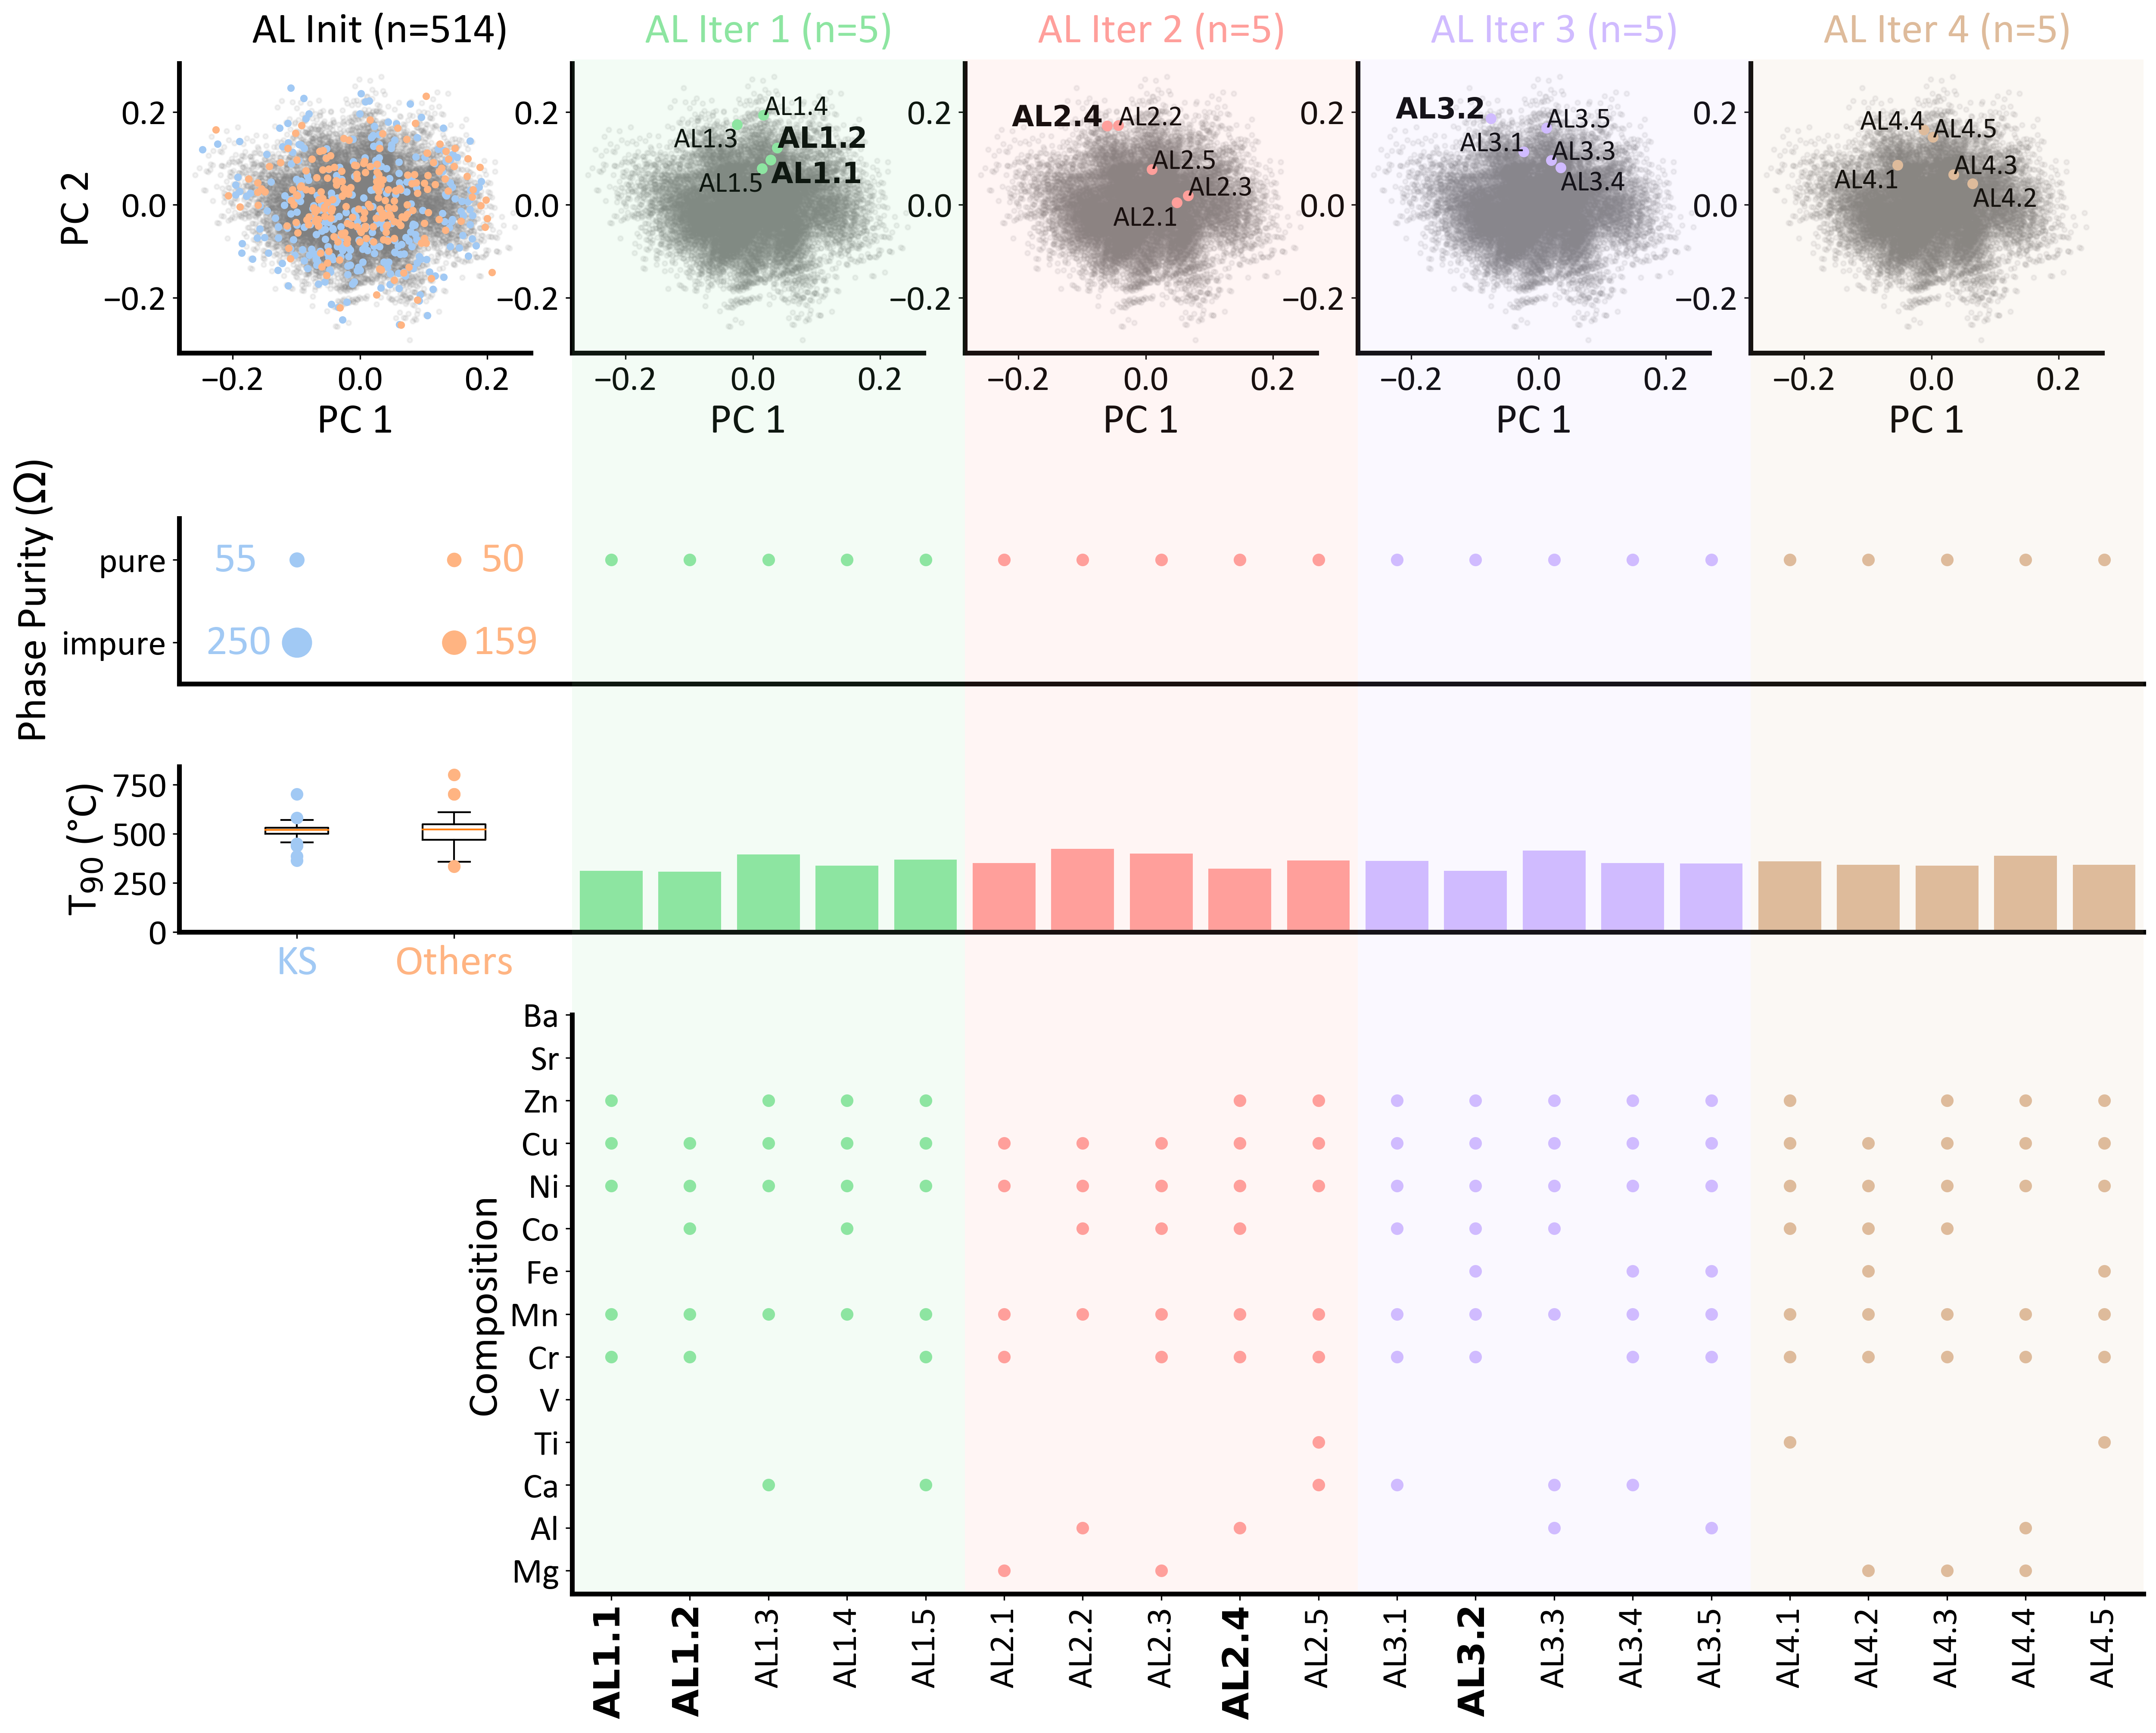

In [21]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# Assuming you have defined al_idx as a list containing indices for subfigures

fs = 8
params = {'legend.fontsize': '%s' % (3.5 * fs),
          'figure.figsize': (fs * 2, fs * 0.4),  # 8*6
          'axes.labelsize': '%s' % (3 * fs),
          'axes.titlesize': '%s' % (3 * fs),
          'xtick.labelsize': '%s' % (2.5 * fs),
          'ytick.labelsize': '%s' % (2.5 * fs),
          'font.family': 'Calibri',
          'axes.linewidth': fs / 3,
          'image.cmap': 'viridis'
          }
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()
plt.rcParams.update(params)

# fig, axes = plt.subplots(1, 5, figsize=(15, 3))
# The embedding might be different using different computers.
pca = PCA(n_components=2, svd_solver='arpack', random_state=0).fit(X)
X_ = pca.transform(X)
# tsne = TSNE(n_components=2, perplexity=30.0, max_iter=1000, random_state=0)
# X_ = tsne.fit_transform(X)

# Plotting the first subfigure
ax = fig.add_axes([0.043, 0.2, 0.17, 0.7])
ax.scatter(X_[:, 0], X_[:, 1], color='gray', s=7, alpha=0.1)
ax.scatter(X_[train_ks_idx][:, 0], X_[train_ks_idx][:, 1], s=10, color=pastel_colors_hex[0])
ax.scatter(X_[train_other_idx][:, 0], X_[train_other_idx][:, 1], s=10, color=pastel_colors_hex[1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xticks([-0.2, 0., 0.2])
ax.set_yticks([-0.2, 0., 0.2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(-0.17, 0.35, 'AL Init (n=514)', size=fs*3, color='black')
colors = pastel_colors_hex[2:6]
for i in range(1, 5):
    ax = fig.add_axes([0.043 + i * 0.19, 0.2, 0.17, 0.7])
    ax.scatter(X_[:, 0], X_[:, 1], color='gray', s=7, alpha=0.1)
    ax.scatter(X_[al_idx[i-1]][:, 0], X_[al_idx[i-1]][:, 1], s=25, color=colors[i-1])
    for j, (x, y) in enumerate(zip(X_[al_idx[i-1]][:, 0], X_[al_idx[i-1]][:, 1])):
        info = f'AL%d.%d' % (i, j + 1)
        if info == 'AL3.1' or info == 'AL4.4':
            x -= 0.1
        elif info == 'AL2.4' or info == 'AL3.2':
            x -= 0.15
        elif info == 'AL1.5' or info == 'AL1.3' or info == 'AL2.1' or info == 'AL4.1':
            x -= 0.1
            y -= 0.05
        elif info == 'AL1.1' or info == 'AL3.4' or info == 'AL4.2':
            y -= 0.05
        if info in ['AL1.1', 'AL1.2', 'AL2.4', 'AL3.2']:
            info =  f"$\mathbf{{{info}}}$"
        ax.text(x, y, info, fontsize=fs*2)
    ax.set_xlabel('PC 1')
    # ax.set_ylabel('PC 2')
    ax.set_yticks([])
    # Customize axis for the later four subfigures
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.set_xticks([-0.2, 0., 0.2])
    ax.set_yticks([-0.2, 0., 0.2])
    ax.text(-0.17, 0.35, 'AL Iter %d (n=5)' % (i), color=colors[i-1], size=fs*3)

ax = fig.add_axes([0.043, -0.6, 0.95, 0.4])
ax.scatter([1], [0], s=250, color=pastel_colors_hex[0])
ax.text(0.1-0.26, -0.14, '250', color=pastel_colors_hex[0], fontsize=fs*3)
ax.scatter([1], [1], s=55, color=pastel_colors_hex[0])
ax.text(0.1-0.16, 1-0.14, '55', color=pastel_colors_hex[0], fontsize=fs*3)

ax.scatter([3], [0], s=159, color=pastel_colors_hex[1])
ax.text(3.5-0.26, -0.14, '159', color=pastel_colors_hex[1], fontsize=fs*3)
ax.scatter([3], [1], s=50, color=pastel_colors_hex[1])
ax.text(3.5-0.16, 1-0.14, '50', color=pastel_colors_hex[1], fontsize=fs*3)

for i in range(4):
    ax.scatter(range(5 + i*5, 5 + (i+1) * 5), np.array(purity[i*5:(i+1) * 5]),  color=colors[i])
    # ax.axvspan(4.5 + i*5, 4.5 + (i+1) * 5, color=colors[i], alpha=0.2, linewidth=0)
ax.set_yticks([0, 1])
ax.set_yticklabels(['impure', 'pure'])
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5, 24.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'Phase Purity ($\Omega$)')
ax.set_xticks([])
plt.tight_layout()

ax = fig.add_axes([0.043, -1.2, 0.95, 0.4])
# data = df_T90['T90'].to_numpy().reshape(-1, 1)
ax.boxplot(df_T90[df_T90.atom_list.isin(df_KS.atom_list_old)]['T90'].to_numpy().reshape(-1, 1), sym=pastel_colors_hex[0], positions=[1], vert=True, widths=0.8)
ax.boxplot(df_T90[df_T90.atom_list.isin(df_others.atom_list_old)]['T90'].to_numpy().reshape(-1, 1), sym=pastel_colors_hex[1], positions=[3], vert=True, 
           widths=0.8)
ax.set_xticks([1, 3])
ax.set_xticklabels(['KS', 'Others'], size=fs*3)
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == 'KS':
        tick_label.set_color(pastel_colors_hex[0])
    elif tick_label.get_text() == 'Others':
        tick_label.set_color(pastel_colors_hex[1])
# ax.axvspan(-0.5, 4.5, 0, 4.76, color='#E58579', alpha=0.1, linewidth=0, clip_on=False)
for i in range(4):
    ax.bar(range(5 + i*5, 5 + (i+1) * 5), T90[i*5:(i+1) * 5], color=colors[i])
    # ax.axvspan(4.5 + i*5, 4.5 + (i+1) * 5, color=colors[i], alpha=0.2, linewidth=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(r'T$_{90}$' + ' (\u00b0C)')
ax.set_xlim([-0.5, 24.5])
ax.set_yticks([0, 250, 500, 750])

ax = fig.add_axes([0.233, -2.8, 0.993-0.233, 1.4])
for i, c in enumerate(composition):
    y = [atoms_pool.index(int(j)) for j in c.split(',')]
    cid = int(i/5)
    ax.scatter([i+5] * len(y), y, color=colors[cid])
    if i%5==0:
        ax.axvspan(4.5 + cid*5, 4.5 + (cid+1) * 5, 0, 2.65, color=colors[cid], alpha=0.1, linewidth=0, clip_on=False)
ax.set_xlim([4.5, 24.5])
ax.set_yticks(range(len(atom_dict)))
ax.set_yticklabels(atom_dict.values())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Composition')
ax.set_xticks(range(5, 25))
ticklabels = ['AL%d.%d' % (i, j) for i in range(1, 5) for j in range(1, 6)]
for i in [0, 1, 8, 11]:
    ticklabels[i] = f"$\mathbf{{{ticklabels[i]}}}$"
ax.set_xticklabels(ticklabels, rotation=90)
plt.savefig('figure2.svg', format='svg', dpi=300, bbox_inches='tight')

# Figure 3: SHAP

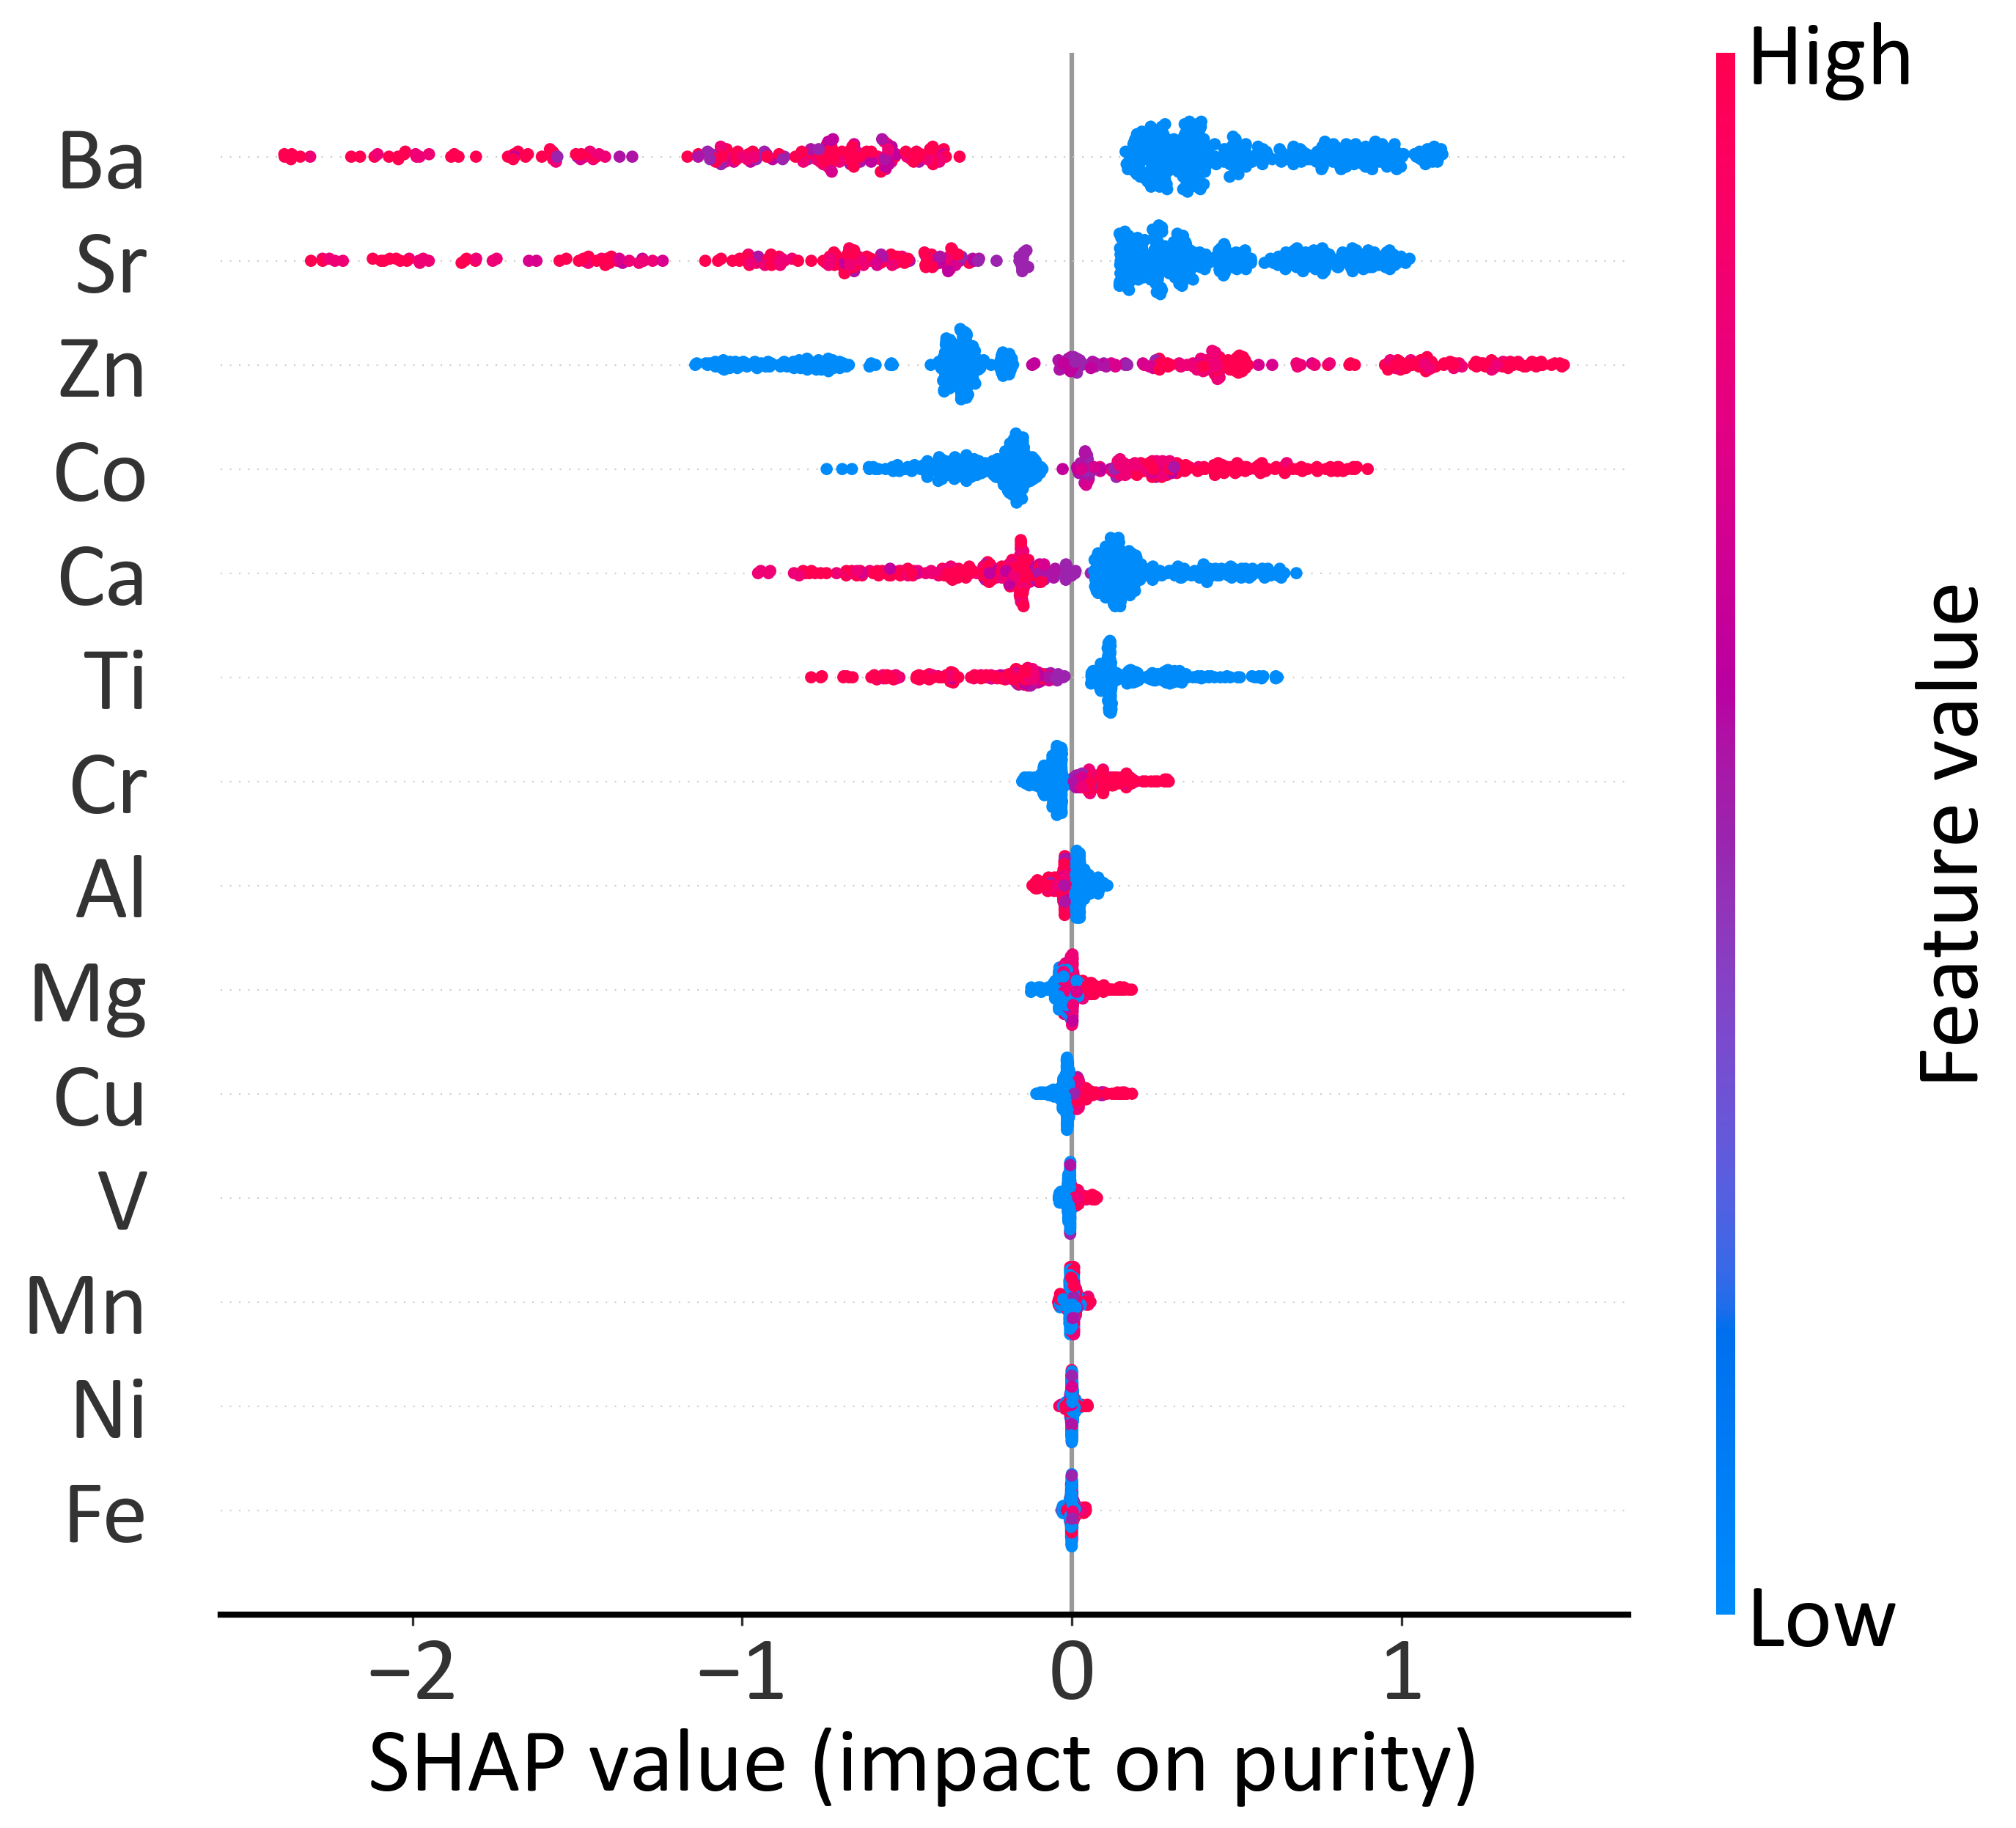

In [14]:
from xgboost import XGBRFClassifier
model = XGBRFClassifier()
#
df = pd.read_csv('../database/raw_data/purity_al_init.csv')
df.atom_list = df.atom_list.apply(lambda x: list(map(int, x.split(','))))
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
X = df[atom_dict.values()]
y = df.purity

fs = 2
params = {
    'legend.fontsize': '%s' % (4. * fs),
    'figure.figsize': (3, 3),  # 10*2
    'axes.labelsize': '%s' % (8 * fs),
    'axes.titlesize': '%s' % (8 * fs),
    'axes.linewidth': 2,
    'xtick.labelsize': '%s' % (8 * fs),
    'ytick.labelsize': '%s' % (8 * fs),
    'font.family': 'Calibri',
    'font.serif': 'calibri',
    'savefig.dpi': 300,
    'figure.dpi': 300,
}
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()
ax = fig.add_axes([0,0,1,1])
import shap
plt.rcParams['font.family'] = 'Calibri'
model.fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
ax = shap.plots.beeswarm(shap_values, max_display=14, show=False)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlabel('SHAP value (impact on purity)', size=30)
cbar = ax._colorbars[0]
cbar.tick_params(labelsize=30)
cbar.set_ylabel('Feature value', size=30)
plt.savefig('figure3a.svg', format='svg', dpi=1200, bbox_inches='tight')